In [170]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score

In [171]:
# load the dataset
df = pd.read_csv('/Users/berekettesfaye/Desktop/corsera/student_scores.csv')


In [172]:
#SPLITING THE TRIANING AND TESTING SETS
X = df.iloc[:,0].values  # select the feature hours for training 0-20 index
y = df.iloc[:,1].values # select the select the last five rows for test

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)
print(y_train)
print(X_test)
print(y_test)

[2.7 3.3 5.1 3.8 1.5 3.2 4.5 8.9 8.5 3.5 2.7 1.9 4.8 6.1 7.8 5.5 7.7 1.1
 7.4 9.2]
[25 42 47 35 20 27 41 95 75 30 30 24 54 67 86 60 85 17 69 88]
[8.3 2.5 2.5 6.9 5.9]
[81 30 21 76 62]


In [175]:
print(X_train)
print(X_test)

[2.7 3.3 5.1 3.8 1.5 3.2 4.5 8.9 8.5 3.5 2.7 1.9 4.8 6.1 7.8 5.5 7.7 1.1
 7.4 9.2]
[8.3 2.5 2.5 6.9 5.9]


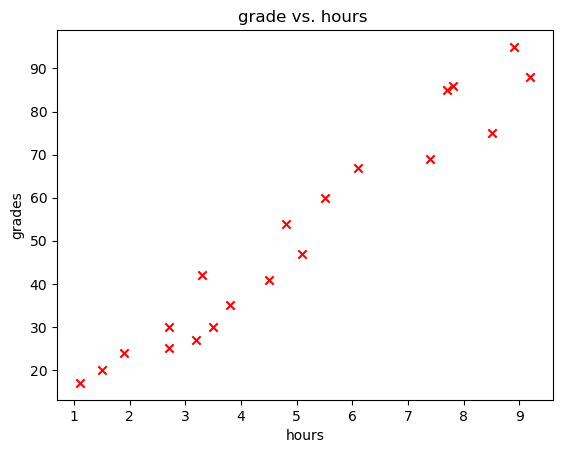

In [176]:
# Creating a scatter plot of the data. To change the markers to red "x",
# i used the 'marker' and 'c' parameters
plt.scatter(X_train, y_train, marker='x', c='r') 

# Set the title
plt.title("grade vs. hours ")
# Set the y-axis label
plt.ylabel('grades')
# Set the x-axis label
plt.xlabel('hours')
plt.show()

In [177]:
# UNQ_C1
# GRADED FUNCTION: compute_cost

def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    # this will be returned as the total cost
    total_cost = 0
    
    
    cost_sum=0
    for i in range(m):  # calculate the cost function for linear regression  𝐽(𝑤,𝑏)
        f_wb_i = w * x[i] + b                          
        cost_i = (f_wb_i - y[i]) ** 2
        cost_sum= cost_sum + cost_i
    total_cost= (1/(2*m)) * cost_sum
    


    return total_cost

In [178]:
# this function will compute the gradient 
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # this will be returned after a we conput the gradiant decent to find the write parameter w
    dj_dw = 0
    dj_db = 0
    
    
    sum_dj_dw = 0
    sum_dj_db = 0
    for i in range(m):
        f_wb_i=w*x[i] +b

        # partial derivative of cost function w.r.t w
        dj_dw_i= (f_wb_i - y[i]) * x[i]

        # partial derivative of the cost function w.r.t d
        dj_db_i = (f_wb_i - y[i])
        sum_dj_dw = sum_dj_dw + dj_dw_i
        sum_dj_db = sum_dj_db + dj_db_i
    dj_dw = sum_dj_dw / m
    dj_db = sum_dj_db / m
  
        
    return dj_dw, dj_db

In [179]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    w = w_in
    b = b_in
 
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db                  
        
        
    return w,b #return w and J

In [180]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500 
alpha = 0.06 # this is the learning rate 

w,b = gradient_descent(X_train,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:",w, b)

w,b found by gradient descent: 9.682078157807064 2.8268923331811915


In [181]:
m = X_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X_train[i] + b

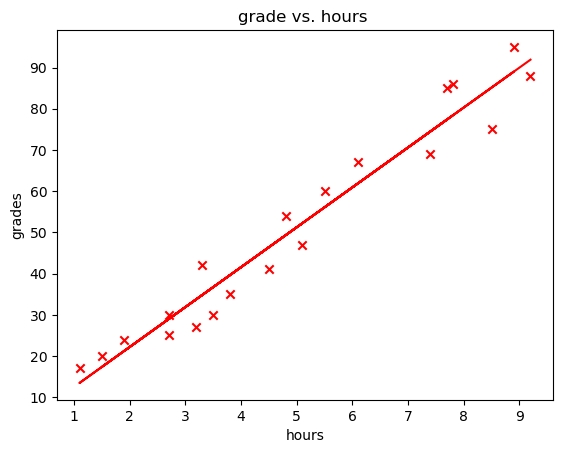

In [182]:
# plot the liner fit
plt.plot(X_train, predicted, c= 'r')

# create a scatter plot for the data
plt.scatter(X_train, y_train, marker = 'x', c = 'r')

# Set the title
plt.title("grade vs. hours ")

# Set the y-axis label
plt.ylabel('grades')
# Set the x-axis label
plt.xlabel('hours')
plt.show()

In [183]:
# now i will test the model with a data that it has never seen
m_pre = X_test.shape[0]
predicted = np.zeros(m_pre)

for i in range(m_pre):
    predicted[i] = w * X_test[i] + b


In [184]:
# lets see the result
print(predicted)
print(y_test)

[83.18814104 27.03208773 27.03208773 69.63323162 59.95115346]
[81 30 21 76 62]


In [189]:
r2 = r2_score(y_test, predicted) # evaluating my model

In [190]:
print("score = ",r2*100)

score =  96.78055545410426
